Testing 1-D random walk turbulence jittering for vertical particle distribution

In [1]:
# imports modules and renames them short names
import numpy as np
import os
from matplotlib import pyplot as plt, animation
from datetime import datetime, timedelta
from dateutil.parser import parse
from IPython.display import HTML
from scipy.stats import skewnorm
import seaborn as sns

# makes the plots show up below the code cells
%matplotlib inline

In [3]:
# Sets the default font size of matplotlib plots
plt.rcParams['font.size'] = 12

Create a 1D random walk turbulence model to jitter particles in the vertical

In [4]:
# Define parameters for the walk

dims = 1 # just 1 dimension, in my case it represents depth
step_n = 10000 # number of timesteps - when implementing this in parcels, divide your "duration" (days) variable by your timestep variable "dt" 
#(seconds) to get the total number of timesteps. It would look like this: (duration*24*60*60)/dt
step_set = [-1, 0, 1] # these are the random step choices, the particles can either go backwards (-1 increment, could be up in my case if depth
# variable is positive for increasing depth), not move at all (0), or go forwards (1 increment). Need to define increments somehow
origin = np.zeros((1,dims)) # this creates a new array, of x dimensions, filled with zeroes. The first 1 I think is basically the number of particles
# if I want to assign an initial depth distribution the array I would create would not be filled with zeroes, but would be all the particles
# and their starting depths

In [5]:
# Simulate steps in 1D

step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]


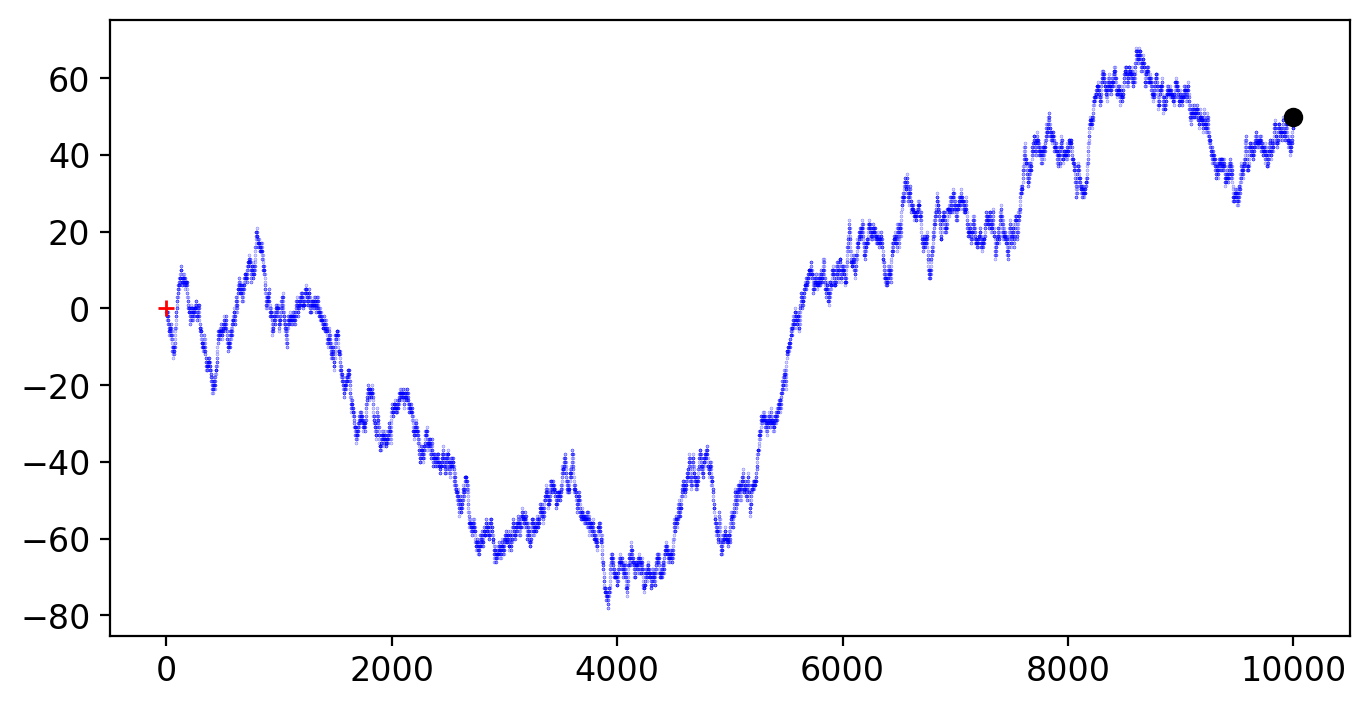

In [15]:
# Plot the path

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c='blue', alpha=0.5, s=0.05);
#ax.plot(path, c='blue', alpha=0.5, lw=0.5, ls='-',);
ax.plot(0, start, c='red', marker='+')
ax.plot(step_n, stop, c='black', marker='o')

# The red + is the particles start, black circle is end. Blue line is its path along the 1 dimension over the timesteps

In [25]:
print(path)

[[ 0.]
 [-1.]
 [-1.]
 ...
 [48.]
 [49.]
 [50.]]


Text(0, 0.5, 'Depth [m]')

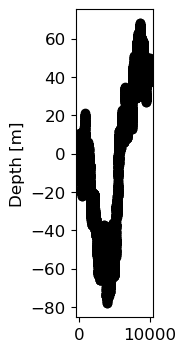

In [17]:
fig, ax = plt.subplots(figsize=(1, 4)) # names the figure fig and sets the figure size
#ax = fig.add_subplot(111)
l = ax.plot(path,  c='black', marker='o')

Try to animate this

In [ ]:
%%capture

fig, ax = plt.subplots(figsize=(1, 4)) # names the figure fig and sets the figure size
ax = fig.add_subplot(111)
l = ax.scatter(np.arange(step_n+1), path, c='blue', alpha=0.5, s=0.05)
ax.set_ylabel('Depth [m]')

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([data.lon[:, hour], data.z[:, hour]]).T)
    l.set_array(data.z[:, hour])
    return l,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=73, interval=100, blit=True)

In [ ]:
# Render animation
HTML(anim.to_html5_video())

Create skewed Gaussian distribution modelled after my pteropod vertical distributions

/tmp/ipykernel_715288/1465986781.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data, kde_kws={'label':'kde of given data'}, label='histogram')


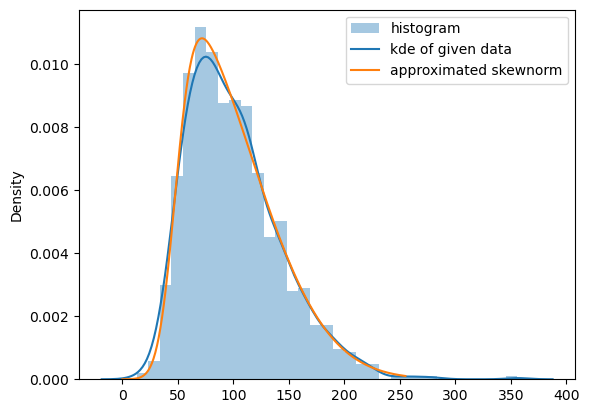

In [40]:
# create some random data from a skewnorm
data = skewnorm.rvs(5, loc=50, scale=70, size=1000).astype(np.int_)

# draw a histogram and kde of the given data
ax = sns.distplot(data, kde_kws={'label':'kde of given data'}, label='histogram')

# find parameters to fit a skewnorm to the data
params = skewnorm.fit(data, 5, loc=80, scale=40)

# draw the pdf of the fitted skewnorm
x = np.linspace(0, 255, 500)
ax.plot(x, skewnorm.pdf(x, *params), label='approximated skewnorm')
plt.legend()
plt.show()

In [41]:
print(params)

(5.378448039731417, 47.758016157226024, 67.34594006680516)
